In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import savReaderWriter
from random import choice
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import mean_squared_error, r2_score, plot_confusion_matrix, recall_score
from sklearn.metrics import accuracy_score, log_loss, precision_score
from sklearn.preprocessing import OneHotEncoder
import copy

from data.roc import plot_roc
%matplotlib inline
datasets = []

In [2]:
# Quick import of cleaned/imputed data
complete_df = pd.read_csv('data/complete_df').drop(columns='Unnamed: 0')

In [ ]:
# Import each dataset 

def import_data():
    
        with savReaderWriter.SavReader('data/N8Final/n8.sav') as reader:
            N8 = pd.DataFrame(reader.all(), columns = [str(s) for s in reader.header])

        N8.columns=N8.columns.str.replace("'", '')
        N8.columns=N8.columns.str[1:]
        datasets.append([N8, 'N8'])


        with savReaderWriter.SavReader('data/N9/N9.SAV') as reader:
            N9 = pd.DataFrame(reader.all(), columns = [str(s) for s in reader.header])


        N9.columns=N9.columns.str.replace("'", '')
        N9.columns=N9.columns.str[1:]
        datasets.append([N9, 'N9'])


        with savReaderWriter.SavReader('data/N10/n10.sav') as reader:
            N10 = pd.DataFrame(reader.all(), columns = [str(s) for s in reader.header])

        N10.columns=N10.columns.str.replace("'", '')
        N10.columns=N10.columns.str[1:]
        datasets.append([N10, 'N10'])


        with savReaderWriter.SavReader('data/N11/n11.sav') as reader:
            N11 = pd.DataFrame(reader.all(), columns = [str(s) for s in reader.header])

        N11.columns=N11.columns.str.replace("'", '')
        N11.columns=N11.columns.str[1:]
        datasets.append([N11, 'N11'])


        with savReaderWriter.SavReader('data/N12/n12.sav') as reader:
            N12 = pd.DataFrame(reader.all(), columns = [str(s) for s in reader.header])

        N12.columns=N12.columns.str.replace("'", '')
        N12.columns=N12.columns.str[1:]
        datasets.append([N12, 'N12'])

        return N8, N9, N10, N11, N12

In [ ]:
N8, N9, N10, N11, N12 = import_data()

In [ ]:
#create dictionaries for columns which have consistent values across all datasets
ethnicity_dict = {1:'Asian', 2:'Black', 3:'Black/Hispanic', 4:'White', 5:'White/Hispanic', 6:'American Indain', 
                  7:'Pacific Islander', 9:'Mixed', 10:'Mixed', 11:'Native American', 18:'Hispanic'}

age_dict = {1:19, 2:22, 3:27, 4:32, 5:37, 6:42, 7:47, 8:52, 9:57, 10:62, 11:67, 
            12:72, 13:int(np.random.normal(80, 2.5, 1))}

work_dict = {1:'Full Time', 2:'Part Time', 3:'Temporary Leave', 4:'Unemployed', 5:'Unemployed', 6:'Student', 
             7:'Retired', 8:'Homemaker', 9:'Disabled', 10:'Never Worked', 11:'Self Employed', 12:'Volunteer Work'}

#functions to clean and return each individual dataset formatted in exactly the same way
#with the exact same columns
def clean_N12(N12):
    state_dict_N12 = {-8: 'Unknown', 1: 'Alabama', 2: 'Alaska', 3:'American Somoa', 4:'Arizona', 5:'Arkansas', 6:'California', 7:'Colorado', 8:'Connecticut', 9:'Deleware', 10:'District of Columbia', 11:'Florida', 12:'Georgia', 13:'Guam', 14:'Hawaii', 15:'Idaho', 16:'Illinois', 17:'Indiana', 18:'Iowa', 19:'Kansas', 20:'Kentucky', 21:'Louisiana', 22:'Maine', 23:'Maryland', 24:'Massachusetts', 25:'Michigan', 26:'Minnesota', 27:'Mississippi', 28:'Missouri', 29:'Montana', 30:'Nebraska', 31:'Nevada', 32:'New Hampshire', 33:'New Jersey', 34:'New Mexico', 35:'New York', 36:'North Carolina', 37:'North Dakota', 38:'Northern Mariana Islands', 39:'Ohio', 40:'Oklahoma', 41:'Oregon', 42:'Pennsylvania', 43:'Peurto Rico', 44:'Rhode Island', 45:'South Carolina', 46:'South Dakota', 47:'Tennessee', 48:'Texas', 49:'Utah', 50:'Vermont', 51:'Virginia', 52:'Virgin Islands', 53:'Washington', 54:'West Virginia', 55:'Wisconsin', 56:'Wyoming', 95:'Unknown', 97:'Unknown', 99:'Unknown'}
    cleaned_N12 = N12[['a1', 'age1', 'mqa2', 'a4', 'a12', 'a17', 'a18c', 'b1c', 'b2c', 'b3c', 'b4c', 'b5', 
                       'n1', 'i3', 'i5', 'i6', 'b31', 'a15']]
    
    cleaned_N12.columns = ['Gender', 'Age', 'State', 'Ethnicity', 'Education', 'Work_Situation', 
                           'Household_Income', 'Wine_Frequency', 'Beer_Frequency', 'Liquor_Frequency', 
                           'Average_Drinking', 'Current_Drinker', 'Been_Arrested', 'Importance_Friends_Family', 
                           'Importance_Religion', 'Importance_Alcoholic', 'Age_Started', 'Religious_Life']
    
    cleaned_N12.insert(loc=0, column='Dataset', value='N12')
    cleaned_N12.loc[:,'State'] = cleaned_N12['State'].map(lambda x:state_dict_N12[x])
    cleaned_N12.loc[:,'Gender'] = cleaned_N12['Gender'].map(lambda x:'M' if x == 1 else 'F')
    cleaned_N12.loc[:,'Ethnicity'] = cleaned_N12['Ethnicity'].map(lambda x: ethnicity_dict[x] 
                                                                  if x in ethnicity_dict.keys() else 'Unknown')
    cleaned_N12.loc[:,'Age'] = cleaned_N12['Age'].map(lambda x:age_dict[x] if x in age_dict.keys() else 'Unknown')
    cleaned_N12.loc[:,'Work_Situation'] = cleaned_N12['Work_Situation'].map(lambda x:work_dict[x]
                                                                            if x in work_dict.keys() else 'Unknown')
    return cleaned_N12

def clean_N11(N11):
    state_dict_N11 = {-8: 'Unknown', 1: 'Alabama', 2: 'Alaska', 3:'American Somoa', 4:'Arizona', 5:'Arkansas', 6:'California', 7:'Colorado', 8:'Connecticut', 9:'Deleware', 10:'District of Columbia', 11:'Florida', 12:'Georgia', 13:'Guam', 14:'Hawaii', 15:'Idaho', 16:'Illinois', 17:'Indiana', 18:'Iowa', 19:'Kansas', 20:'Kentucky', 21:'Louisiana', 22:'Maine', 23:'Maryland', 24:'Massachusetts', 25:'Michigan', 26:'Minnesota', 27:'Mississippi', 28:'Missouri', 29:'Montana', 30:'Nebraska', 31:'Nevada', 32:'New Hampshire', 33:'New Jersey', 34:'New Mexico', 35:'New York', 36:'North Carolina', 37:'North Dakota', 38:'Northern Mariana Islands', 39:'Ohio', 40:'Oklahoma', 41:'Oregon', 42:'Pennsylvania', 43:'Peurto Rico', 44:'Rhode Island', 45:'South Carolina', 46:'South Dakota', 47:'Tennessee', 48:'Texas', 49:'Utah', 50:'Vermont', 51:'Virgin Islands', 52:'Virginia', 53:'Washington', 54:'West Virginia', 55:'Wisconsin', 56:'Wyoming', 95:'Unknown', 97:'Unknown', 99:'Unknown'}
    cleaned_N11 = N11[['qa1', 'age1', 'mqa2', 'qa4', 'qa12', 'qa17', 'qa18', 'qb1', 'qb2', 'qb3', 'qb4', 'qb5', 
                       'qn1', 'qi3', 'qi5', 'qi6', 'qb31', 'qa15']]
    
    cleaned_N11.columns = ['Gender', 'Age', 'State', 'Ethnicity', 'Education', 'Work_Situation', 
                           'Household_Income', 'Wine_Frequency', 'Beer_Frequency', 'Liquor_Frequency', 
                           'Average_Drinking', 'Current_Drinker', 'Been_Arrested', 'Importance_Friends_Family', 
                           'Importance_Religion', 'Importance_Alcoholic', 'Age_Started', 'Religious_Life']
    
    cleaned_N11.insert(loc=0, column='Dataset', value='N11')
    cleaned_N11.loc[:,'State'] = cleaned_N11['State'].map(lambda x:state_dict_N11[x] 
                                                          if x in state_dict_N11.keys() else 'Unknown')
    cleaned_N11.loc[:,'Gender'] = cleaned_N11['Gender'].map(lambda x:'M' if x == 1 else 'F')
    cleaned_N11.loc[:,'Ethnicity'] = cleaned_N11['Ethnicity'].map(lambda x: ethnicity_dict[x] 
                                                                  if x in ethnicity_dict.keys() else 'Unknown')
    cleaned_N11.loc[:,'Age'] = cleaned_N11['Age'].map(lambda x: age_dict[x] if x in age_dict.keys() else 'Unknown')
    cleaned_N11.loc[:,'Work_Situation'] = cleaned_N11['Work_Situation'].map(lambda x:work_dict[x] 
                                                                            if x in work_dict.keys() else 'Unknown')
    return cleaned_N11

def clean_N10(N10):
    state_dict_N10 = {-8: 'Unknown', 1: 'Alabama', 2: 'Alaska', 4:'Arizona', 5:'Arkansas', 6:'California', 8:'Colorado', 9:'Connecticut', 10:'Deleware', 11:'District of Columbia', 12:'Florida', 13:'Georgia', 15:'Hawaii', 16:'Idaho', 17:'Illinois', 18:'Indiana', 19:'Iowa', 20:'Kansas', 21:'Kentucky', 22:'Louisiana', 23:'Maine', 24:'Maryland', 25:'Massachusetts', 26:'Michigan', 27:'Minnesota', 28:'Mississippi', 29:'Missouri', 30:'Montana', 31:'Nebraska', 32:'Nevada', 33:'New Hampshire', 34:'New Jersey', 35:'New Mexico', 36:'New York', 37:'North Carolina', 38:'North Dakota', 39:'Ohio', 40:'Oklahoma', 41:'Oregon', 42:'Pennsylvania', 44:'Rhode Island', 45:'South Carolina', 46:'South Dakota', 47:'Tennessee', 48:'Texas', 49:'Utah', 50:'Vermont', 51:'Virginia', 53:'Washington', 54:'West Virginia', 55:'Wisconsin', 56:'Wyoming', 99:'Unknown'}
    cleaned_N10 = N10[['a1', 'cage', 'a2a', 'a4', 'a12', 'a17', 'a18', 'b1', 'b2', 'b3', 'b4', 'b5', 'n1',
                       'i3', 'i5', 'i6', 'b31', 'a15']]
    
    cleaned_N10.columns = ['Gender', 'Age', 'State', 'Ethnicity', 'Education', 'Work_Situation', 
                           'Household_Income', 'Wine_Frequency', 'Beer_Frequency', 'Liquor_Frequency', 
                           'Average_Drinking', 'Current_Drinker', 'Been_Arrested', 'Importance_Friends_Family', 
                           'Importance_Religion', 'Importance_Alcoholic', 'Age_Started', 'Religious_Life']
    
    cleaned_N10.insert(loc=0, column='Dataset', value='N10')
    cleaned_N10.loc[:,'State'] = cleaned_N10['State'].map(lambda x:state_dict_N10[x] 
                                                          if x in state_dict_N10.keys() else 'Unknown')
    cleaned_N10.loc[:,'Gender'] = cleaned_N10['Gender'].map(lambda x:'M' if x == 1 else 'F')
    cleaned_N10.loc[:,'Ethnicity'] = cleaned_N10['Ethnicity'].map(lambda x: ethnicity_dict[x] 
                                                                  if x in ethnicity_dict.keys() else 'Unknown')
    cleaned_N10.loc[:,'Age'] = cleaned_N10['Age'].map(lambda x: 'Unknown' if x>90 else x)
    cleaned_N10.loc[:,'Work_Situation'] = cleaned_N10['Work_Situation'].map(lambda x:work_dict[x]
                                                                            if x in work_dict.keys() else 'Unknown')
    return cleaned_N10

def clean_N9(N9):
    state_dict_N9 = {-8: 'Unknown', 1: 'Alabama', 2: 'Alaska', 4:'Arizona', 5:'Arkansas', 6:'California', 8:'Colorado', 9:'Connecticut', 10:'Deleware', 11:'District of Columbia', 12:'Florida', 13:'Georgia', 15:'Hawaii', 16:'Idaho', 17:'Illinois', 18:'Indiana', 19:'Iowa', 20:'Kansas', 21:'Kentucky', 22:'Louisiana', 23:'Maine', 24:'Maryland', 25:'Massachusetts', 26:'Michigan', 27:'Minnesota', 28:'Mississippi', 29:'Missouri', 30:'Montana', 31:'Nebraska', 32:'Nevada', 33:'New Hampshire', 34:'New Jersey', 35:'New Mexico', 36:'New York', 37:'North Carolina', 38:'North Dakota', 39:'Ohio', 40:'Oklahoma', 41:'Oregon', 42:'Pennsylvania', 44:'Rhode Island', 45:'South Carolina', 46:'South Dakota', 47:'Tennessee', 48:'Texas', 49:'Utah', 50:'Vermont', 51:'Virginia', 53:'Washington', 54:'West Virginia', 55:'Wisconsin', 56:'Wyoming', 99:'Unknown'}
    cleaned_N9 = N9[['q1', 'q3', 'q6', 'q9', 'q18', 'q23', 'q27', 'q35a', 'q35b', 'q35c', 'q35d', 'la', 
                     'q222', 'q167c', 'q167e', 'q167c', 'q55', 'q22']]
    
    cleaned_N9.columns = ['Gender', 'Age', 'State', 'Ethnicity', 'Education', 'Work_Situation', 
                          'Household_Income', 'Wine_Frequency', 'Beer_Frequency', 'Liquor_Frequency', 
                          'Average_Drinking', 'Current_Drinker', 'Been_Arrested', 'Importance_Friends_Family', 
                          'Importance_Religion', 'Importance_Alcoholic', 'Age_Started', 'Religious_Life']
    
    cleaned_N9.insert(loc=0, column='Dataset', value='N9')
    cleaned_N9.loc[:,'State'] = cleaned_N9['State'].map(lambda x:state_dict_N9[x] 
                                                        if x in state_dict_N9.keys() else 'Unknown')
    cleaned_N9.loc[:,'Gender'] = cleaned_N9['Gender'].map(lambda x:'M' if x == 1 else 'F')
    cleaned_N9.loc[:,'Ethnicity'] = cleaned_N9['Ethnicity'].map(lambda x: ethnicity_dict[x] 
                                                                if x in ethnicity_dict.keys() else 'Unknown')
    cleaned_N9.loc[:,'Age'] = cleaned_N9['Age'].map(lambda x: 'Unknown' if x>90 else x)
    cleaned_N9.loc[:,'Work_Situation'] = cleaned_N9['Work_Situation'].map(lambda x:work_dict[x] 
                                                                          if x in work_dict.keys() else 'Unknown')
    return cleaned_N9

def clean_N8(N8):
    state_dict_N8 = {-8: 'Unknown', 1: 'Alabama', 2: 'Alaska', 3:'Arizona', 4:'Arkansas', 5:'California', 6:'Colorado', 7:'Connecticut', 8:'Deleware', 9:'District of Columbia', 10:'Florida', 11:'Georgia', 12:'Hawaii', 13:'Idaho', 14:'Illinois', 15:'Indiana', 16:'Iowa', 17:'Kansas', 18:'Kentucky', 19:'Louisiana', 20:'Maine', 21:'Maryland', 22:'Massachusetts', 23:'Michigan', 24:'Minnesota', 25:'Mississippi', 26:'Missouri', 27:'Montana', 28:'Nebraska', 29:'Nevada', 30:'New Hampshire', 31:'New Jersey', 32:'New Mexico', 33:'New York', 34:'North Carolina', 35:'North Dakota', 36:'Ohio', 37:'Oklahoma', 38:'Oregon', 39:'Pennsylvania', 40:'Rhode Island', 41:'South Carolina', 42:'South Dakota', 43:'Tennessee', 44:'Texas', 45:'Utah', 46:'Vermont', 47:'Virginia', 48:'Washington', 49:'West Virginia', 51:'Wisconsin', 50:'Wyoming', 99:'Unknown'}
    cleaned_N8 = N8[['n8m135', 'n8m140', 'n8m152', 'n8m149', 'n8m158', 'n8m163', 'n8m171', 'n8m207', 
                     'n8m209', 'n8m211', 'n8m213', 'n8m133', 'n8m770', 'n8m460', 'n8m462', 'n8m463', 'n8m162']]
    
    cleaned_N8.columns = ['Gender', 'Age', 'State', 'Ethnicity', 'Education', 'Work_Situation', 
                          'Household_Income', 'Wine_Frequency', 'Beer_Frequency', 'Liquor_Frequency', 
                          'Average_Drinking', 'Current_Drinker', 'Been_Arrested', 'Importance_Friends_Family', 
                          'Importance_Religion', 'Importance_Alcoholic', 'Religious_Life']
    
    cleaned_N8.insert(loc=0, column='Dataset', value='N8')
    cleaned_N8.loc[:,'State'] = cleaned_N8['State'].map(lambda x:state_dict_N8[x] 
                                                        if x in state_dict_N8.keys() else 'Unknown')
    cleaned_N8.loc[:,'Gender'] = cleaned_N8['Gender'].map(lambda x:'M' if x == 1 else 'F')
    cleaned_N8.loc[:,'Ethnicity'] = cleaned_N8['Ethnicity'].map(lambda x: ethnicity_dict[x] 
                                                                if x in ethnicity_dict.keys() else 'Unknown')
    cleaned_N8.loc[:,'Age'] = cleaned_N8['Age'].map(lambda x: int(np.random.normal(80, 2.5, 1)) 
                                                    if 90-x > 74 else 90-x if x!=99 else 'Unknown')
    cleaned_N8.loc[:,'Work_Situation'] = cleaned_N8['Work_Situation'].map(lambda x:work_dict[x] 
                                                                          if x in work_dict.keys() else 'Unknown')
    return cleaned_N8

In [ ]:
#call the clean functions and create a dataframe from each 
cleaned_N8 = clean_N8(N8)
cleaned_N9 = clean_N9(N9)
cleaned_N10 = clean_N10(N10)
cleaned_N11 = clean_N11(N11)
cleaned_N12 = clean_N12(N12)   

In [ ]:
#Create a final dataframe by concatenating all of the cleaned dataframes
frames = [cleaned_N8, cleaned_N9, cleaned_N10, cleaned_N11, cleaned_N12]
final_df = pd.concat(frames, ignore_index=True)

In [ ]:
complete_df.head()

In [ ]:
# Create features to flag imputed data before imputing 

final_df['is_null_Age_Started'] = final_df.Age_Started.isnull().astype(int)
final_df['is_null_Importance_Friends_Family'] = np.logical_not(final_df['Importance_Friends_Family'].between(1,4)).astype(int)
final_df['is_null_Importance_Alcoholic'] = np.logical_not(final_df['Importance_Alcoholic'].between(1,4)).astype(int)
final_df['is_null_Importance_Religion'] = np.logical_not(final_df['Importance_Religion'].between(1,4)).astype(int)

In [3]:
def impute_data(final_df):

        # Impute Been_Arrested values based on probability
        final_df['Been_Arrested'] = final_df['Been_Arrested'].map(lambda x: x 
                                                if x > 0 and x < 3 
                                                else np.random.choice(([1,2]), p=[0.1, .9])) 

        # Impute Age_Started values from normal distribution then cast to integer
        final_df['Age_Started'] = final_df['Age_Started'].map(lambda x: x 
                                                if x>5 and x<90 
                                                else int(np.random.normal(20, 2.5, 1)))

        # Impute income values with the mode for the few unknown values
        final_df['Household_Income'] = final_df['Household_Income'].map(lambda x: 7 
                                                 if x > 12 else x)

        # Impute income values with the mode for the few unknown values
        final_df['Education'] = final_df['Education'].map(lambda x: 12 
                                                if x > 30 else x)

        # Impute Age values which are unknown with normal distribution
        final_df['Age'] = final_df['Age'].map(lambda x: int(np.random.normal(48, 17, 1)) 
                                                if x == 'Unknown'  or x<17 or x>90
                                              else x)
        
        # Impute small percentage of drinking frequency features using probability
        num_range = [11,10,9,8,7,6,5,4]
        p = np.array([.46, .15, .16, .07, .05, .04, .04, .03])
        p /= np.sum(p)
        final_df['Liquor_Frequency'] = final_df['Liquor_Frequency'].map(lambda x: x 
                                                if x < 12 
                                                else np.random.choice((num_range), p=p))
        p = np.array([.45, .13, .11, .08, .08, .1, .03, .01, .01])
        p /= np.sum(p)
        final_df['Beer_Frequency'] = final_df['Beer_Frequency'].map(lambda x: x 
                                                 if x < 12 
                                                 else np.random.choice(([11,10,9,8,7,6,5,4,3]), p=p))
        p = np.array([.38, .16, .18, .08, .07, .07, .03, .03])
        p /= np.sum(p)
        final_df['Wine_Frequency'] = final_df['Wine_Frequency'].map(lambda x: x 
                                                if x < 12 
                                                else np.random.choice(([11,10,9,8,7,6,5,4]), p=p))
        p = np.array([.29, .11, .155, .08, .10, .125, .07, .07])
        p /= np.sum(p)
        final_df['Average_Drinking'] = final_df['Average_Drinking'].map(lambda x: x 
                                                if x < 12 
                                                else np.random.choice(([11,10,9,8,7,6,5,4]), p=p))
        
        
        
        # Impute small percentage of Unknown values in behavioral columns
        num_range = [4,3,2,1]
        p = np.array([.38, .13, .14, .35])
        p /= np.sum(p)
        final_df['Importance_Religion'] = final_df['Importance_Religion'].map(lambda x: x 
                                                if x > 0 and x < 5 
                                                else np.random.choice((num_range), p=p))
        p = np.array([.39, .12, .12, .37])
        p /= np.sum(p)
        final_df['Importance_Friends_Family'] = final_df['Importance_Friends_Family'].map(lambda x: x 
                                                if x > 0 and x < 5 
                                                else np.random.choice((num_range), p=p))
        p = np.array([.44, .13, .11, .32])
        p /= np.sum(p)
        final_df['Importance_Alcoholic'] = final_df['Importance_Alcoholic'].map(lambda x: x 
                                                if x > 0 and x < 5 
                                                else np.random.choice((num_range), p=p))
        p = np.array([.04, .07, .27, .62])
        p /= np.sum(p)
        final_df['Religious_Life'] = final_df['Religious_Life'].map(lambda x: x 
                                                if x > 0 and x < 5 
                                                else np.random.choice((num_range), p=p))
        
        return final_df

In [4]:
# Run imputing function
complete_df = impute_data(complete_df)

In [5]:
complete_df.groupby('Average_Drinking')['Average_Drinking'].count()

Average_Drinking
1.0      189
2.0      250
3.0      932
4.0      469
5.0     1792
6.0     3506
7.0     2886
8.0     2374
9.0     4337
10.0    3119
11.0    8054
Name: Average_Drinking, dtype: int64

In [8]:
complete_df.groupby('Importance_Alcoholic')['Importance_Alcoholic'].count()

Importance_Alcoholic
1.0     9046
2.0     3037
3.0     3660
4.0    12165
Name: Importance_Alcoholic, dtype: int64

In [24]:
complete_df.mean()

Age                                  46.680844
Age_Started                          19.253046
Average_Drinking                      8.672710
Been_Arrested                         1.834169
Beer_Frequency                        9.210406
Education                            13.374158
Household_Income                      5.805253
Importance_Alcoholic                  2.678802
Importance_Friends_Family             2.532894
Importance_Religion                   2.551240
Liquor_Frequency                      9.583883
Religious_Life                        1.537552
Wine_Frequency                        9.266304
is_null_Age_Started                   0.073742
is_null_Importance_Friends_Family     0.035438
is_null_Importance_Alcoholic          0.227712
is_null_Importance_Religion           0.059589
dtype: float64

In [25]:
complete_df.std()

Age                                  17.390210
Age_Started                           4.647093
Average_Drinking                      5.809769
Been_Arrested                         0.371935
Beer_Frequency                        2.196174
Education                             3.579318
Household_Income                      2.559351
Importance_Alcoholic                  1.318392
Importance_Friends_Family             1.330810
Importance_Religion                   1.307680
Liquor_Frequency                      1.801094
Religious_Life                        0.805071
Wine_Frequency                        1.972386
is_null_Age_Started                   0.261356
is_null_Importance_Friends_Family     0.184887
is_null_Importance_Alcoholic          0.419364
is_null_Importance_Religion           0.236727
dtype: float64

In [9]:
# Dictionaies for assigning numeric values for clustering

ethnicity_dict = {'Asian':1, 'Black':2, 'Black/Hispanic':3, 'White':4, 'White/Hispanic':5, 
                  'American Indain':6, 'Pacific Islander':7, 'Mixed':8, 'Mixed':9, 'Native American':10, 
                  'Hispanic':11, 'Unknown': 12}
work_dict = {'Full Time':1, 'Part Time':2, 'Temporary Leave':3, 'Unemployed':4, 'Unemployed':5, 'Student':6, 
             'Retired':7, 'Homemaker':8, 'Disabled':9, 'Never Worked':10, 'Self Employed':11, 'Volunteer Work':12, 'Unknown': 13}

state_dict = {'Alabama':1, 'Alaska':2, 'American Somoa':3, 'Arizona':4, 'Arkansas':5,'California':6,'Colorado':7,
              'Connecticut':8,'Deleware':9, 'District of Columbia':10, 'Florida':11, 'Georgia':12, 'Guam':13, 
              'Hawaii':14, 'Idaho':15, 'Illinois':16, 'Indiana':17, 'Iowa':18, 'Kansas':19, 'Kentucky':20, 
              'Louisiana':21, 'Maine':67,'Maryland':22, 'Massachusetts':23, 'Michigan':24, 'Minnesota':25, 
              'Mississippi':26, 'Missouri':27, 'Montana':28, 'Nebraska':29, 'Nevada':30, 'New Hampshire':31,
              'New Jersey':32, 'New Mexico':33,'New York':34, 'North Carolina':35, 'North Dakota':36, 
              'Northern Mariana Islands':37, 'Ohio':38,'Oklahoma':39,'Oregon':40, 'Pennsylvania':51, 
              'Peurto Rico':52,'Rhode Island':53,'South Carolina':54,'South Dakota':55, 'Tennessee':56,
              'Texas':57,'Utah':58, 'Vermont':59, 'Virginia':60, 'Virgin Islands':61, 'Washington':62,
              'West Virginia':63, 'Wisconsin':64, 'Wyoming':65, 'Unknown':66}

gender_dict = {'F':0, 'M':1}

In [ ]:
complete_df[complete_df['Importance_Alcoholic'].between(1,4, inclusive=True)]

In [ ]:
def make_clustering_df(col_name):
    
    cluster_df = complete_df[complete_df[col_name].between(1,4, inclusive=True)] # Only include rows with values 1-4
    
    #Convert all strings to numeric values for clustering
    cluster_df['Ethnicity'] = cluster_df['Ethnicity'].map(lambda x: ethnicity_dict[x])
    cluster_df['Work_Situation'] = cluster_df['Work_Situation'].map(lambda x: work_dict[x])
    cluster_df['Gender'] = cluster_df['Gender'].map(lambda x: gender_dict[x])
    cluster_df['State'] = cluster_df['State'].map(lambda x: state_dict[x])
    
    X = cluster_df.drop(columns=col_name)
    y = cluster_df[col_name]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    
    
    clf = RandomForestClassifier(max_depth=6, min_samples_split=5, n_jobs=-1)
    clf.fit(X_train, y_train)
    predicted = clf.predict(X_test)
    
    #clustering = KMeans(n_clusters=4).fit(test_df) 
    #clusters = clustering.labels_
    
    result_df = pd.concat([y_test, pd.DataFrame(predicted)], axis=1)
    
    #print(result_df[col_name].corr(result_df[0]))
    return result_df

RandomForestClassifier

In [ ]:
make_clustering_df('Importance_Religion')
make_clustering_df('Importance_Alcoholic')
make_clustering_df('Importance_Friends_Family')

In [10]:
complete_df.groupby('Average_Drinking')['Average_Drinking'].count()

Average_Drinking
1.0      189
2.0      250
3.0      932
4.0      469
5.0     1792
6.0     3506
7.0     2886
8.0     2374
9.0     4337
10.0    3119
11.0    8054
Name: Average_Drinking, dtype: int64

In [11]:
def group_by_class():
    
    mask_low = complete_df[complete_df['Average_Drinking'] <= 5]
    mask_middle = complete_df[complete_df['Average_Drinking'] > 7]
    mask_middle = mask_middle[complete_df['Average_Drinking'] < 9] 
    mask_high = complete_df[complete_df['Average_Drinking'] == 11]
    
    return mask_low, mask_middle, mask_high

In [12]:
heavy, low, no_drinking = group_by_class()

/media/illuminator/Main/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


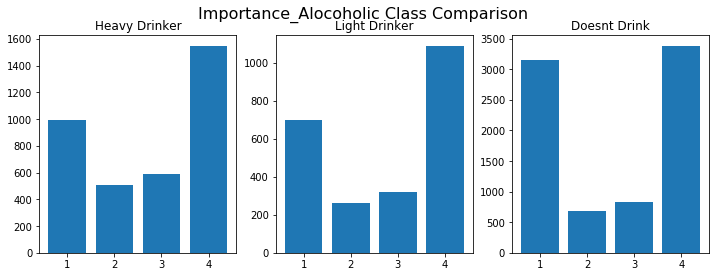

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle('Importance_Alocoholic Class Comparison', fontsize=16)
ax1.bar(sorted(np.unique(complete_df['Importance_Alcoholic'].values)), heavy.groupby('Importance_Alcoholic')['Importance_Alcoholic'].count())
ax2.bar(sorted(np.unique(complete_df['Importance_Alcoholic'].values)), low.groupby('Importance_Alcoholic')['Importance_Alcoholic'].count())
ax3.bar(sorted(np.unique(complete_df['Importance_Alcoholic'].values)), no_drinking.groupby('Importance_Alcoholic')['Importance_Alcoholic'].count())
ax1.set_title('Heavy Drinker')
ax2.set_title('Light Drinker')
ax3.set_title('Doesnt Drink');

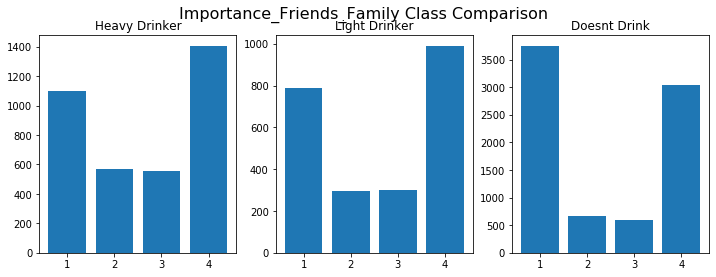

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle('Importance_Friends_Family Class Comparison', fontsize=16)
ax1.bar(sorted(np.unique(complete_df['Importance_Friends_Family'].values)), heavy.groupby('Importance_Friends_Family')['Importance_Friends_Family'].count())
ax2.bar(sorted(np.unique(complete_df['Importance_Friends_Family'].values)), low.groupby('Importance_Friends_Family')['Importance_Friends_Family'].count())
ax3.bar(sorted(np.unique(complete_df['Importance_Friends_Family'].values)), no_drinking.groupby('Importance_Friends_Family')['Importance_Friends_Family'].count())
ax1.set_title('Heavy Drinker')
ax2.set_title('Light Drinker')
ax3.set_title('Doesnt Drink');

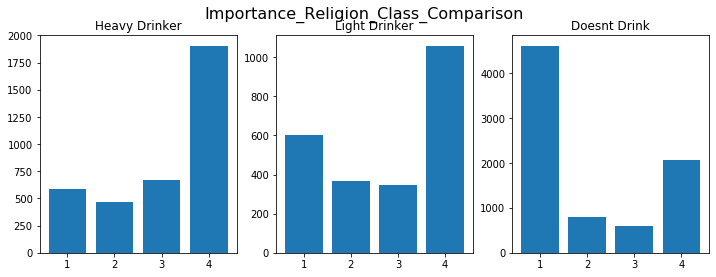

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle('Importance_Religion_Class_Comparison', fontsize=16)
ax1.bar(sorted(np.unique(complete_df['Importance_Religion'].values)), heavy.groupby('Importance_Religion')['Importance_Religion'].count())
ax2.bar(sorted(np.unique(complete_df['Importance_Religion'].values)), low.groupby('Importance_Religion')['Importance_Religion'].count())
ax3.bar(sorted(np.unique(complete_df['Importance_Religion'].values)), no_drinking.groupby('Importance_Religion')['Importance_Religion'].count())
ax1.set_title('Heavy Drinker')
ax2.set_title('Light Drinker')
ax3.set_title('Doesnt Drink');

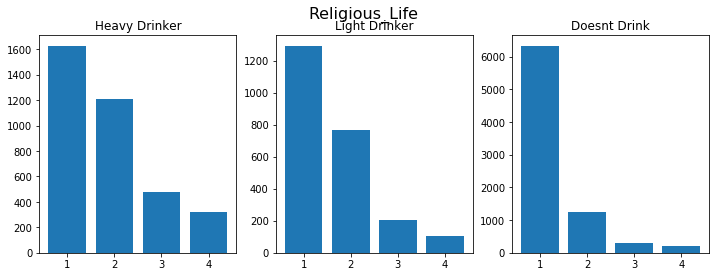

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle('Religious_Life', fontsize=16)
ax1.bar(sorted(np.unique(complete_df['Religious_Life'].values)), heavy.groupby('Religious_Life')['Religious_Life'].count())
ax2.bar(sorted(np.unique(complete_df['Religious_Life'].values)), low.groupby('Religious_Life')['Religious_Life'].count())
ax3.bar(sorted(np.unique(complete_df['Religious_Life'].values)), no_drinking.groupby('Religious_Life')['Religious_Life'].count())
ax1.set_title('Heavy Drinker')
ax2.set_title('Light Drinker')
ax3.set_title('Doesnt Drink');

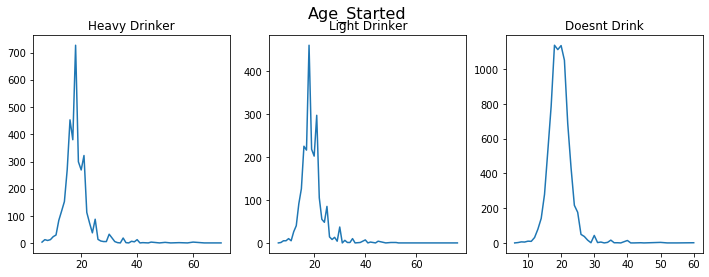

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle('Age_Started', fontsize=16)
ax1.plot(heavy.groupby('Age_Started')['Age_Started'].count())
ax2.plot(low.groupby('Age_Started')['Age_Started'].count())
ax3.plot(no_drinking.groupby('Age_Started')['Age_Started'].count())
ax1.set_title('Heavy Drinker')
ax2.set_title('Light Drinker')
ax3.set_title('Doesnt Drink');


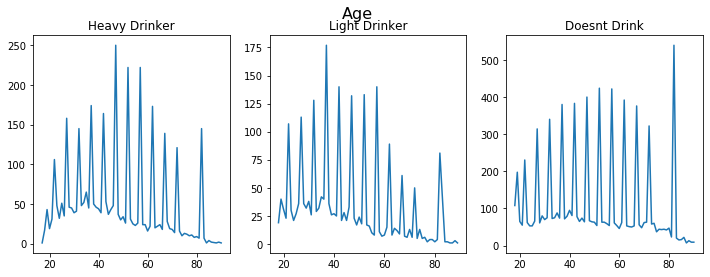

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle('Age', fontsize=16)
ax1.plot(heavy.groupby('Age')['Age'].count())
ax2.plot(low.groupby('Age')['Age'].count())
ax3.plot(no_drinking.groupby('Age')['Age'].count())
ax1.set_title('Heavy Drinker')
ax2.set_title('Light Drinker')
ax3.set_title('Doesnt Drink');


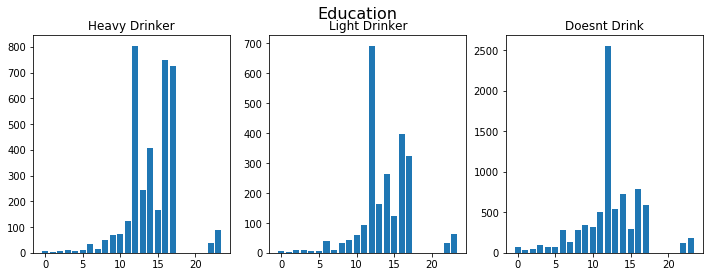

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle('Education', fontsize=16)
ax1.bar(sorted(np.unique(complete_df['Education'].values)), heavy.groupby('Education')['Education'].count())
ax2.bar(sorted(np.unique(complete_df['Education'].values)), low.groupby('Education')['Education'].count())
ax3.bar(sorted(np.unique(complete_df['Education'].values)), no_drinking.groupby('Education')['Education'].count())
ax1.set_title('Heavy Drinker')
ax2.set_title('Light Drinker')
ax3.set_title('Doesnt Drink');

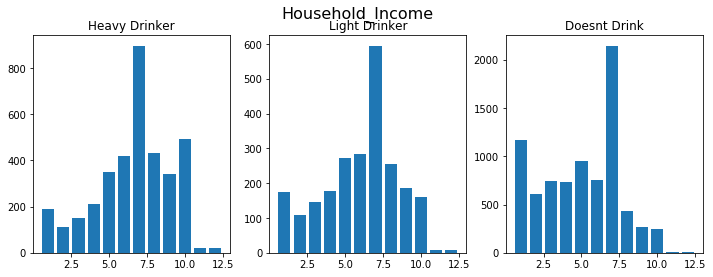

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle('Household_Income', fontsize=16)
ax1.bar(sorted(np.unique(complete_df['Household_Income'].values)), heavy.groupby('Household_Income')['Household_Income'].count())
ax2.bar(sorted(np.unique(complete_df['Household_Income'].values)), low.groupby('Household_Income')['Household_Income'].count())
ax3.bar(sorted(np.unique(complete_df['Household_Income'].values)), no_drinking.groupby('Household_Income')['Household_Income'].count())
ax1.set_title('Heavy Drinker')
ax2.set_title('Light Drinker')
ax3.set_title('Doesnt Drink');

In [24]:
cluster_df = copy.copy(complete_df)

In [25]:
cluster_df.groupby('Average_Drinking')['Average_Drinking'].count()

Average_Drinking
1.0      189
2.0      250
3.0      932
4.0      469
5.0     1792
6.0     3506
7.0     2886
8.0     2374
9.0     4337
10.0    3119
11.0    8054
Name: Average_Drinking, dtype: int64

In [83]:
cluster_df['target'] = cluster_df['Average_Drinking'].map(lambda x: 0 if x==11
                                                                  else 1 if x==7 or x==8
                                                                    else 2 if x<=5
                                                                     else None)

train_df = cluster_df[cluster_df['target'].notnull()]
train_df = train_df.drop(columns=['Beer_Frequency', 'Liquor_Frequency', 'Wine_Frequency', 
                                  'Average_Drinking']);

In [84]:
def convert_split(target_col):    
    
    #Convert all strings to numeric values for clustering
    train_df['Ethnicity'] = train_df['Ethnicity'].map(lambda x: ethnicity_dict[x])
    train_df['Work_Situation'] = train_df['Work_Situation'].map(lambda x: work_dict[x])
    train_df['Gender'] = train_df['Gender'].map(lambda x: gender_dict[x])
    train_df['State'] = train_df['State'].map(lambda x: state_dict[x])
    
    X = train_df.drop(columns=target_col)
    y = train_df[target_col]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
    return X_train, X_test, y_train, y_test

In [85]:
X_train, X_test, y_train, y_test= convert_split('target')

In [86]:
RF_model = RandomForestClassifier(class_weight={0:1, 1:2, 2:1})
RF_model.fit(X_train, y_train)

RF_train_predict = RF_model.predict(X_train)
RF_test_predict = RF_model.predict(X_test)

In [87]:
accuracy_score(y_test, RF_test_predict)

0.5954684918574463

Text(0.5, 1.0, 'Random Forest Confusion Matrix')

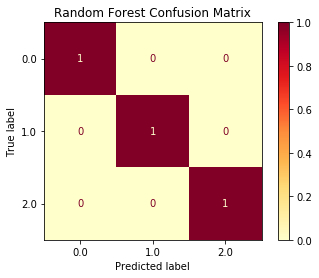

In [88]:
RF_conf = plot_confusion_matrix(RF_model, X_train, y_train, normalize='true', cmap='YlOrRd')
RF_conf.ax_.grid(False)
RF_conf.ax_.set_title('Random Forest Confusion Matrix')

In [41]:
GB_model = GradientBoostingClassifier(learning_rate=0.03, max_depth=5, n_estimators=300, 
                                      min_samples_split=10, min_samples_leaf=2)
GB_model.fit(X_train, y_train)

GB_train_predict = GB_model.predict(X_train)
GB_test_predict = GB_model.predict(X_test)


In [42]:
accuracy_score(y_test, GB_test_predict)

0.616237904177484

Text(0.5, 1.0, 'Gradient Boosting Confusion Matrix')

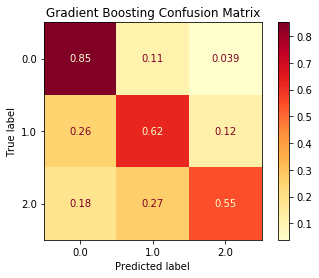

In [46]:
GB_conf = plot_confusion_matrix(GB_model, X_train ,y_train ,normalize='true',cmap='YlOrRd')
GB_conf.ax_.grid(False)
GB_conf.ax_.set_title('Gradient Boosting Confusion Matrix')
#plt.savefig('Gradient_Boosting_Confusion_Matrix_2')

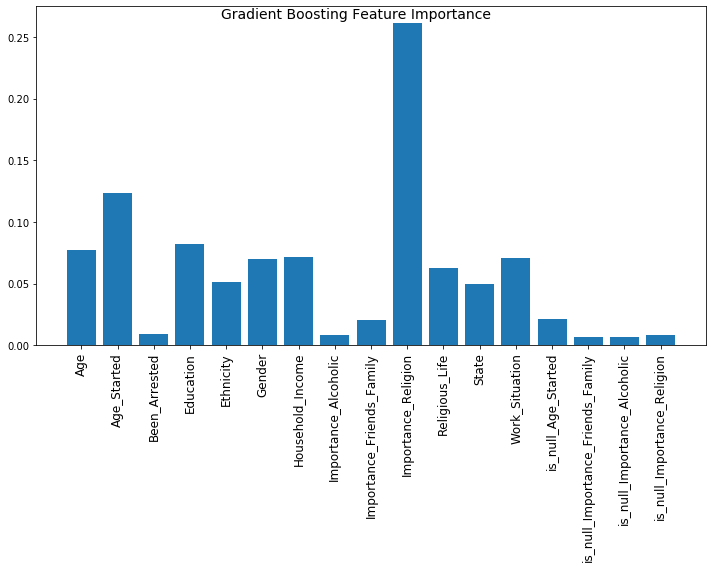

In [324]:
feature_importances = GB_model.feature_importances_
names = np.array(list(X_train.columns))

fig, ax = plt.subplots(figsize=(10,8))
fig.suptitle('Gradient Boosting Feature Importance', fontsize=14)
ax.bar(names, feature_importances)
ax.set_xticklabels(labels=names, rotation=90, fontsize=12);

#fig.savefig('Gradient_Boosting_Feature_Importance')
plt.tight_layout()

In [196]:
X_test['predicted'] = GB_test_predict
X_test['actual'] = y_test

In [198]:
compare_df = X_test[X_test['predicted'] == X_test['actual']]

In [ ]:
{'class_weight': {0: 1, 1: 1, 2: 1},
 'fit_intercept': True,
 'penalty': 'l2',
 'solver': 'sag',
 'warm_start': True}

In [120]:
LR = LogisticRegression(fit_intercept=True, penalty='l2', solver='sag', warm_start=True, C=.8)
RF = RandomForestClassifier(n_estimators=25,max_depth=10)
GB = GradientBoostingClassifier(learning_rate=0.03, max_depth=5, n_estimators=300, 
                                      min_samples_split=10, min_samples_leaf=2)

In [122]:
# OHE RandomForest & LogisticRegression

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_train)
X_train_one_hot = enc.transform(X_train)
X_test_one_hot = enc.transform(X_test)
LR.fit(X_train_one_hot,y_train)
LR_y_pred = LR.predict(X_test_one_hot)
#print(log_loss(y_test,y_pred))
RF.fit(X_train_one_hot,y_train)
RF_y_pred = RF.predict(X_test_one_hot)
#print(log_loss(y_test,y_pred))
GB.fit(X_train_one_hot,y_train)
GB_y_pred = GB.predict(X_test_one_hot)
#print(X_train_one_hot.shape)

/media/illuminator/Main/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [124]:
print(f'LR: {accuracy_score(y_test, LR_y_pred)}')
print(f'RF: {accuracy_score(y_test, RF_y_pred)}')
print(f'GB: {accuracy_score(y_test, GB_y_pred)}')

LR: 0.6039650696247345
RF: 0.5850837856974275
GB: 0.6032570214774605


Text(0.5, 1.0, 'Gradient Boosting Confusion Matrix')

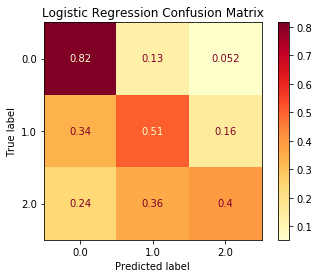

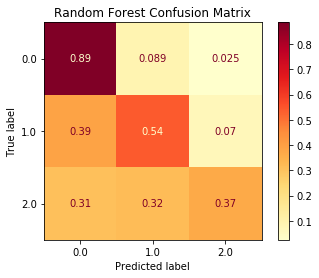

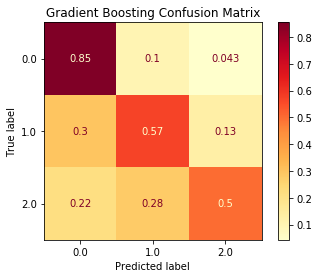

In [123]:
conf_LR = plot_confusion_matrix(LR, X_train_one_hot ,y_train ,normalize='true',cmap='YlOrRd')
conf_RF = plot_confusion_matrix(RF, X_train_one_hot ,y_train ,normalize='true',cmap='YlOrRd')
conf_GB = plot_confusion_matrix(GB, X_train_one_hot ,y_train ,normalize='true',cmap='YlOrRd')
conf_LR.ax_.grid(False)
conf_RF.ax_.grid(False)
conf_GB.ax_.grid(False)
conf_LR.ax_.set_title('Logistic Regression Confusion Matrix')
conf_RF.ax_.set_title('Random Forest Confusion Matrix')
conf_GB.ax_.set_title('Gradient Boosting Confusion Matrix')

In [114]:
def logistic_class_grid_search():
    
    params = {
        'penalty':['l2'],
        'fit_intercept':[True],
        'class_weight':[{0:1,1:1,2:1}],
        'solver':['sag'],
        'warm_start':[True],
        'C':[.75, .8, .85]}
        
    
    gg_gridsearch = GridSearchCV(LogisticRegression(), 
                  params,
                  n_jobs=-1,
                  scoring='neg_log_loss')

    gg_gridsearch.fit(X_train, y_train)
    
    return gg_gridsearch.best_params_


In [115]:
logistic_class_grid_search()

/media/illuminator/Main/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


{'C': 0.8,
 'class_weight': {0: 1, 1: 1, 2: 1},
 'fit_intercept': True,
 'penalty': 'l2',
 'solver': 'sag',
 'warm_start': True}

In [129]:
def gradient_class_grid_search():
    
    params = {
        'learning_rate':[.03,.05,.06,.08],
        'n_estimators':[300, 400],
        'min_samples_split':[8, 10],
        'min_samples_leaf':[2,4],
        'max_depth':[4, 5, 7],
        'warm_start':[True, False]}
        
    gg_gridsearch = GridSearchCV(GradientBoostingClassifier(), 
                  params,
                  n_jobs=-1,
                  verbose=True,
                  scoring='neg_log_loss')

    gg_gridsearch.fit(X_train, y_train)
    
    print(gg_gridsearch.best_params_)
    return gg_gridsearch.best_params_


best_accuracy = {'learning_rate': 0.03,
         'max_depth': 5,
         'min_samples_leaf': 2,
         'min_samples_split': 10,
         'n_estimators': 300}

In [130]:
opt_params = gradient_class_grid_search()

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 49.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 118.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 213.9min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed: 266.3min finished


{'learning_rate': 0.03, 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 400, 'warm_start': False}


In [116]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]


for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))

KNeighborsClassifier
****Results****
Accuracy: 67.4495%
SVC
****Results****
Accuracy: 61.7149%
NuSVC
****Results****
Accuracy: 71.5729%
AdaBoostClassifier
****Results****
Accuracy: 76.1879%
GaussianNB
****Results****
Accuracy: 73.0202%
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 72.8837%
